In [1]:
import cv2
import os
import matplotlib.pyplot as plt
import sys
parent_dir = os.path.abspath('..')
sys.path.append(parent_dir)
from utils.TrainingUtils import train_test_generation

In [2]:
X_train, X_test, y_train, y_test = train_test_generation(['front','left'])

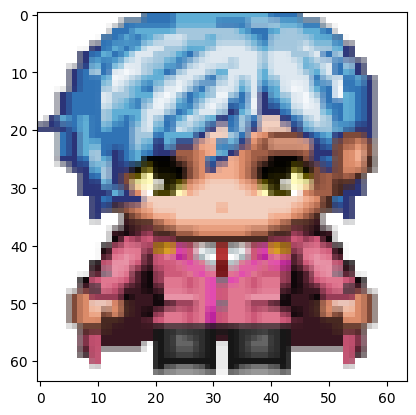

In [9]:
plt.imshow(X_train[150])

%md
---
# Pix2Pix implementation